In [1]:
import datetime
today = datetime.date.today()
date = str(today)
#date = "2020-03-26"

#url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-%s.xlsx" % date
url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx"

import pandas as pd
data = pd.read_excel(url)

In [2]:
countries = ['DE', 'ES', 'FR', 'IT', 'SE', 'UK', 'US', 'KR', 'JP', 'CN', 'IN']

import math
def rawData(df, title):
    cases = pd.DataFrame(columns = ['Date'])

    for country in countries:
        countryData = df[df['geoId'] == country][['dateRep', title]]
        countryData.columns = ['Date', country]
        cases = pd.merge(cases, countryData, on='Date', how='right')
        cases = cases.fillna(0)

    return cases.sort_values(by=['Date'])

def sumData(df):
    a = df[countries].to_numpy()

    for i in range(1, df.shape[0]):
        a[i] = a[i] + a[i - 1]

    return pd.DataFrame(data=a, index=cases['Date'], columns=countries)

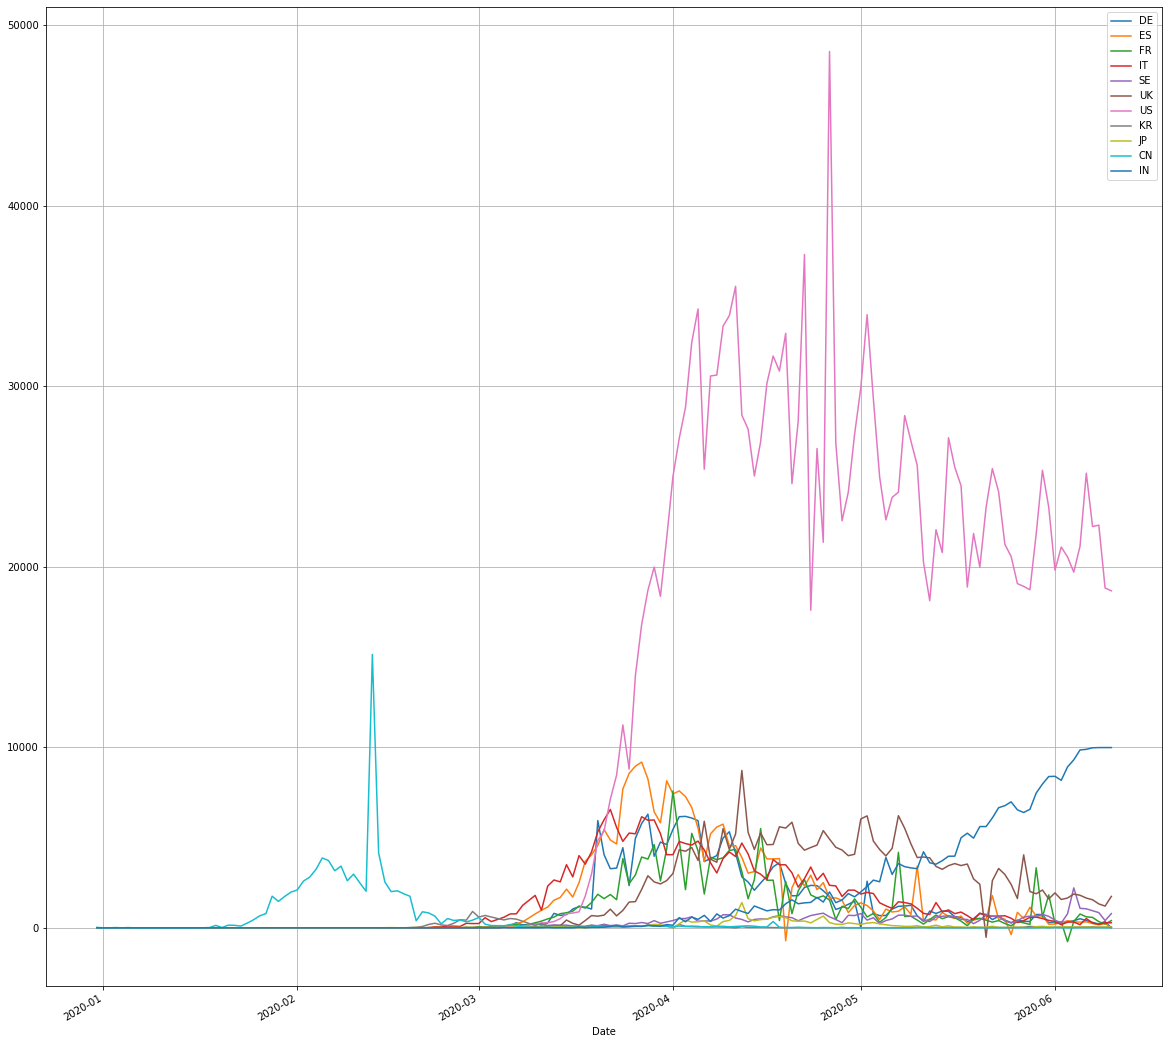

In [3]:
cases = rawData(data, 'cases')
cases.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

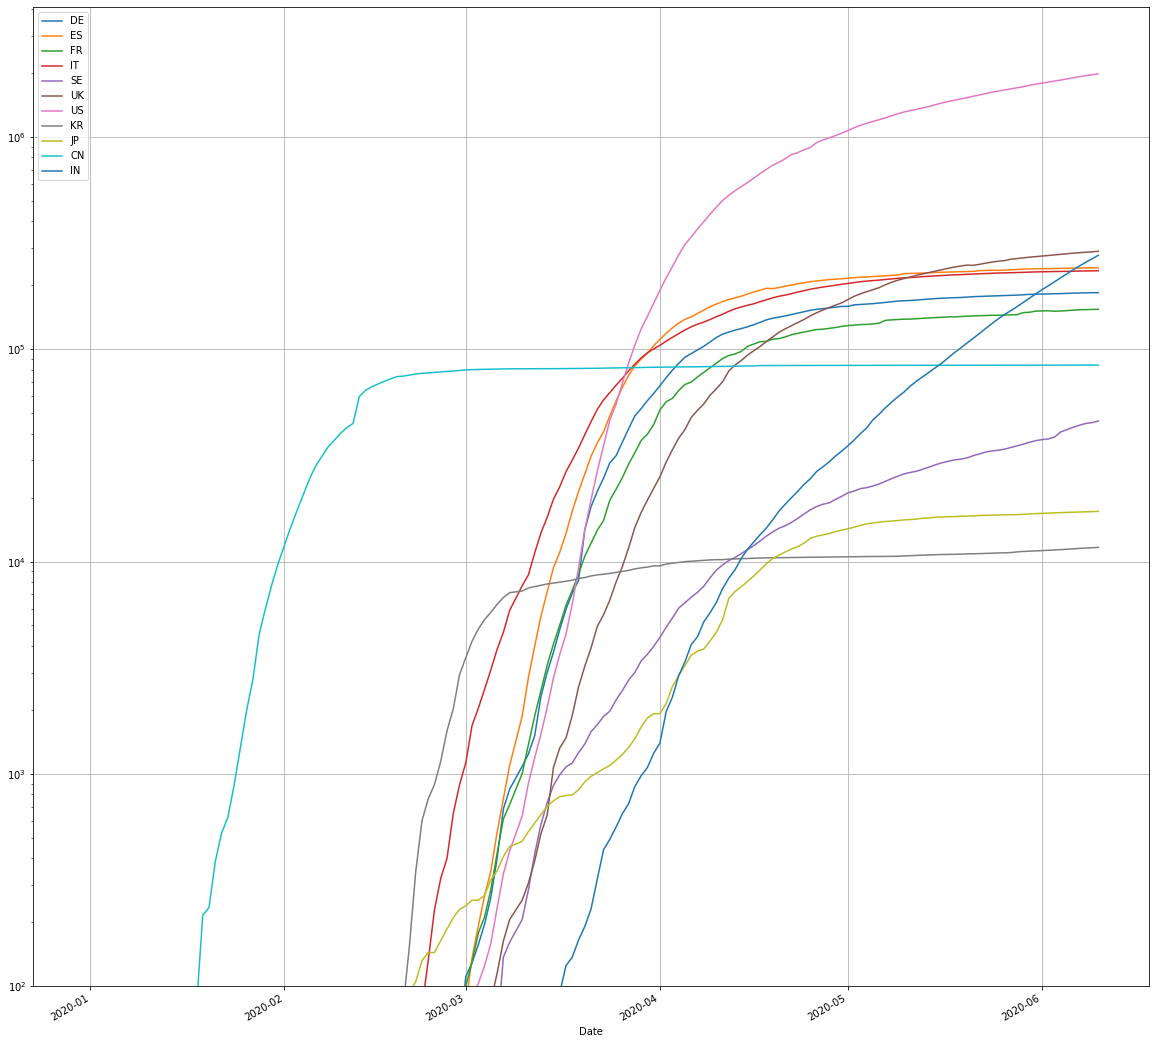

In [4]:
sumCases = sumData(cases)
sumCases.plot.line(logy=True, figsize=(20, 20), ylim=(100, None), grid=True)

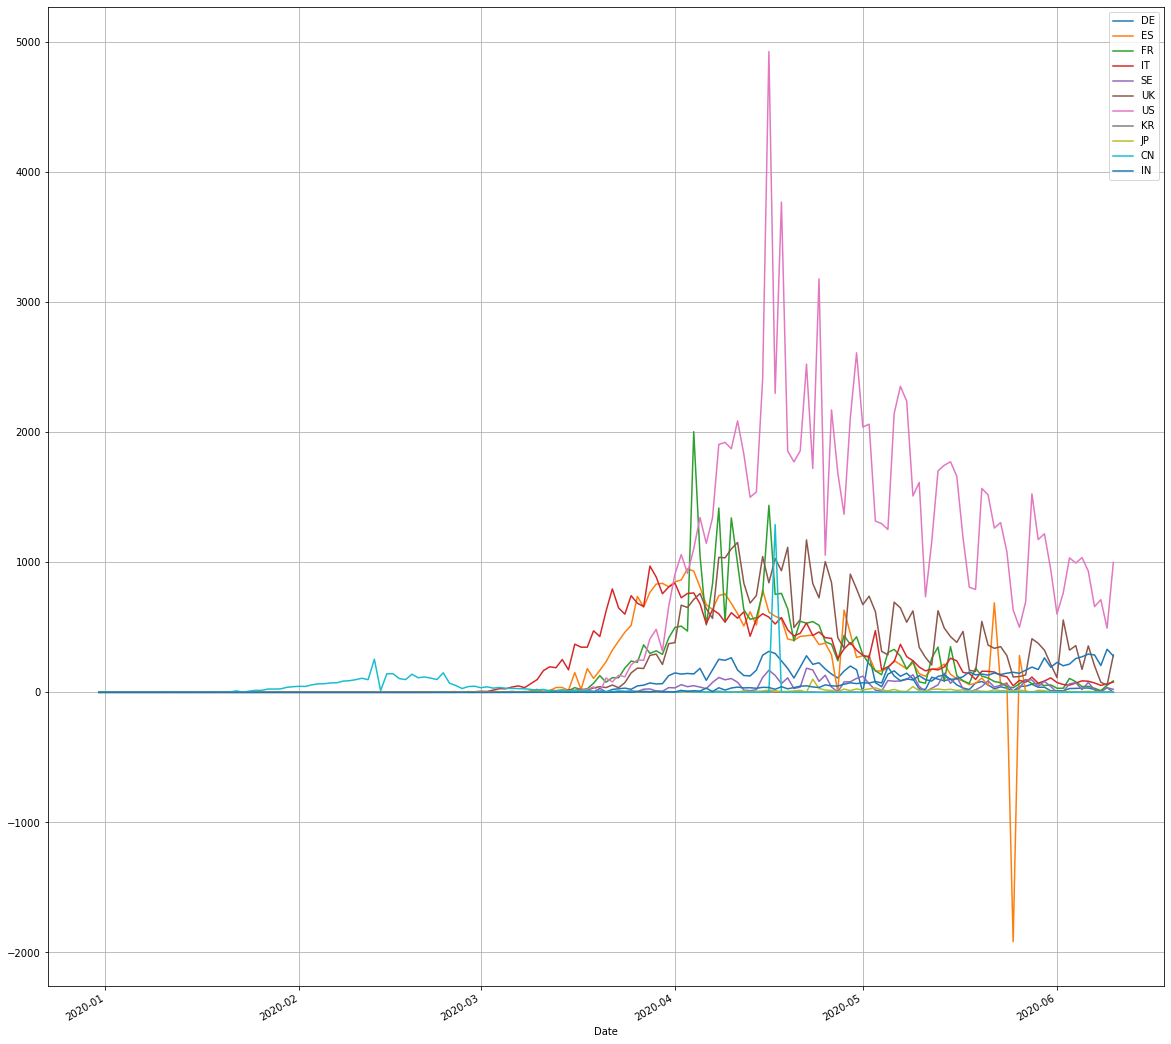

In [5]:
deaths = rawData(data, 'deaths')
deaths.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

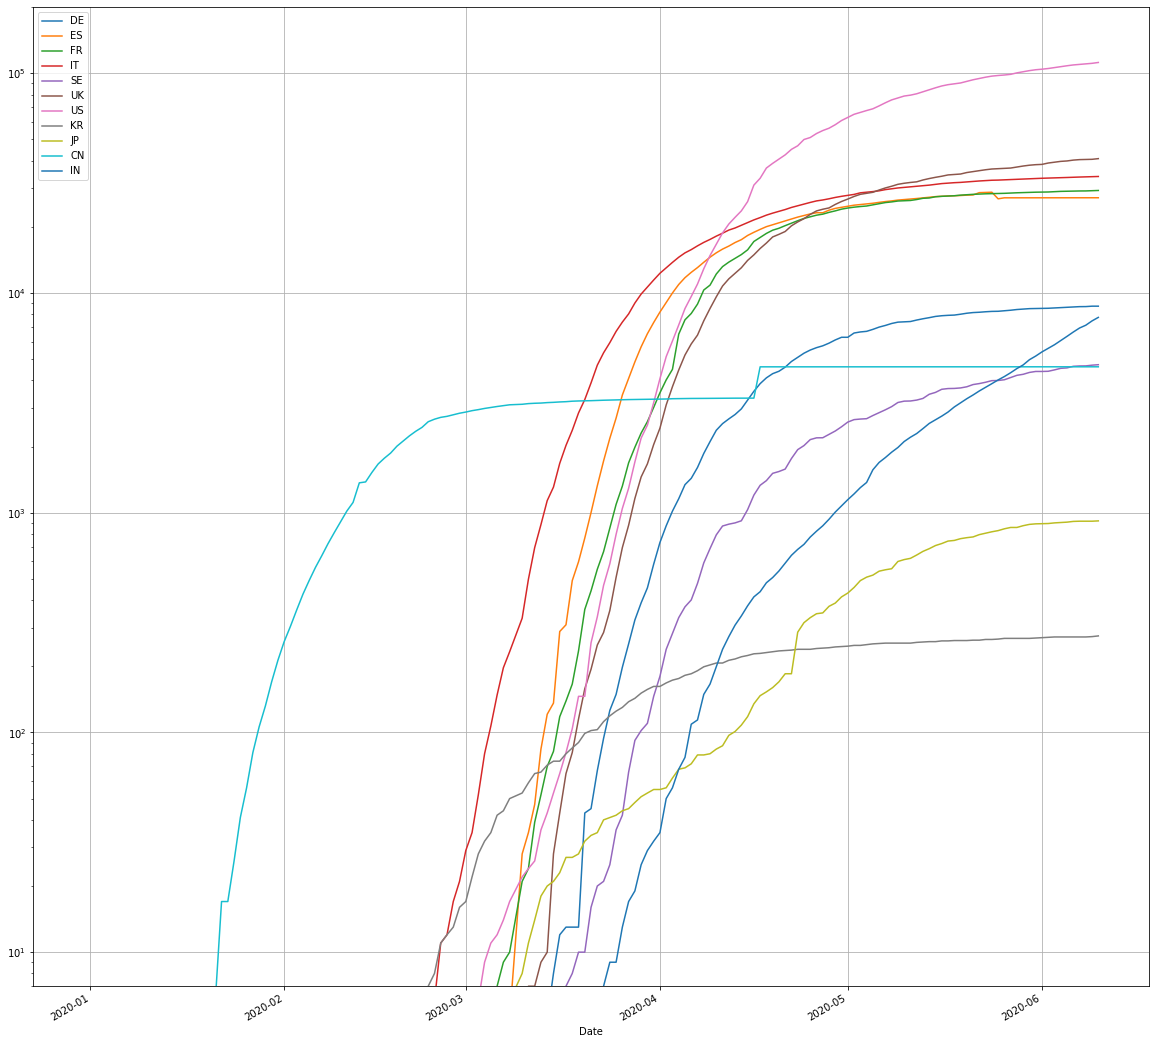

In [6]:
sumDeaths = sumData(deaths)
sumDeaths.plot.line(logy=True, figsize=(20, 20), ylim=(7, None), grid=True)

In [7]:
cases.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-05-27,362.0,510.0,276,397,597,4043,18910,40,28,1,6387
12,2020-05-28,353.0,1137.0,191,584,648,2013,18721,79,0,3,6566
11,2020-05-29,741.0,658.0,3325,593,639,1887,21817,58,68,0,7466
10,2020-05-30,738.0,664.0,597,516,749,2095,25337,39,85,17,7964
9,2020-05-31,286.0,201.0,1828,416,637,1604,23297,27,47,5,8380
8,2020-06-01,333.0,209.0,257,355,429,1936,19807,35,33,19,8392
7,2020-06-02,213.0,294.0,338,178,272,1570,21086,38,46,7,8171
6,2020-06-03,342.0,394.0,-766,318,775,1653,20544,49,56,5,8909
5,2020-06-04,394.0,334.0,352,321,2214,1871,19699,39,32,1,9304
4,2020-06-05,507.0,318.0,767,177,1080,1805,21140,39,46,11,9851


In [8]:
sumCases.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-05-27,179309.0,236336.0,145145.0,229063.0,34398.0,265160.0,1681091.0,11017.0,16618.0,84058.0,151767.0
2020-05-28,179662.0,237473.0,145336.0,229647.0,35046.0,267173.0,1699812.0,11096.0,16618.0,84061.0,158333.0
2020-05-29,180403.0,238131.0,148661.0,230240.0,35685.0,269060.0,1721629.0,11154.0,16686.0,84061.0,165799.0
2020-05-30,181141.0,238795.0,149258.0,230756.0,36434.0,271155.0,1746966.0,11193.0,16771.0,84078.0,173763.0
2020-05-31,181427.0,238996.0,151086.0,231172.0,37071.0,272759.0,1770263.0,11220.0,16818.0,84083.0,182143.0
2020-06-01,181760.0,239205.0,151343.0,231527.0,37500.0,274695.0,1790070.0,11255.0,16851.0,84102.0,190535.0
2020-06-02,181973.0,239499.0,151681.0,231705.0,37772.0,276265.0,1811156.0,11293.0,16897.0,84109.0,198706.0
2020-06-03,182315.0,239893.0,150915.0,232023.0,38547.0,277918.0,1831700.0,11342.0,16953.0,84114.0,207615.0
2020-06-04,182709.0,240227.0,151267.0,232344.0,40761.0,279789.0,1851399.0,11381.0,16985.0,84115.0,216919.0


In [9]:
deaths.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-05-27,47.0,1.0,98,78,96,134,696,0,12,0,170
12,2020-05-28,62.0,1.0,66,117,95,412,1526,0,0,0,194
11,2020-05-29,39.0,2.0,66,70,46,377,1175,0,16,0,175
10,2020-05-30,39.0,4.0,52,87,84,324,1219,0,12,0,265
9,2020-05-31,11.0,2.0,57,111,45,215,945,1,5,0,193
8,2020-06-01,11.0,0.0,31,75,0,113,602,1,1,0,230
7,2020-06-02,11.0,0.0,31,60,8,556,764,1,2,0,204
6,2020-06-03,29.0,1.0,107,55,65,324,1034,1,6,0,217
5,2020-06-04,30.0,5.0,81,71,74,359,994,0,3,0,260
4,2020-06-05,32.0,1.0,44,88,20,176,1036,0,4,0,273


In [10]:
sumDeaths.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-05-27,8349.0,27118.0,28521.0,32822.0,4125.0,37048.0,98912.0,268.0,857.0,4615.0,4337.0
2020-05-28,8411.0,27119.0,28587.0,32939.0,4220.0,37460.0,100438.0,268.0,857.0,4615.0,4531.0
2020-05-29,8450.0,27121.0,28653.0,33009.0,4266.0,37837.0,101613.0,268.0,873.0,4615.0,4706.0
2020-05-30,8489.0,27125.0,28705.0,33096.0,4350.0,38161.0,102832.0,268.0,885.0,4615.0,4971.0
2020-05-31,8500.0,27127.0,28762.0,33207.0,4395.0,38376.0,103777.0,269.0,890.0,4615.0,5164.0
2020-06-01,8511.0,27127.0,28793.0,33282.0,4395.0,38489.0,104379.0,270.0,891.0,4615.0,5394.0
2020-06-02,8522.0,27127.0,28824.0,33342.0,4403.0,39045.0,105143.0,271.0,893.0,4615.0,5598.0
2020-06-03,8551.0,27128.0,28931.0,33397.0,4468.0,39369.0,106177.0,272.0,899.0,4615.0,5815.0
2020-06-04,8581.0,27133.0,29012.0,33468.0,4542.0,39728.0,107171.0,272.0,902.0,4615.0,6075.0
